In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [20]:
r_wp = np.logspace(-1, 1.5, 20)
r_wp = (r_wp[:-1]+r_wp[1:])/2.
print r_wp
r_vpf = np.logspace(0,1.,15)
print r_vpf
r_ds = np.logspace(-1, 1.5, 21)
r_ds = np.sqrt(0.5*(r_ds[:-1]**2 + r_ds[1:]**2))
print r_ds

[  0.11769381   0.15934284   0.21573048   0.29207236   0.39542981
   0.535363     0.72481522   0.98131006   1.32857231   1.79872241
   2.43524742   3.29702348   4.46376155   6.04338043   8.18198882
  11.07739976  14.99742768  20.3046601   27.48999565]
[  1.           1.17876863   1.38949549   1.63789371   1.93069773
   2.27584593   2.6826958    3.16227766   3.72759372   4.39397056
   5.17947468   6.1054023    7.19685673   8.48342898  10.        ]
[  0.11786177   0.1571712    0.20959116   0.2794943    0.37271165
   0.49701897   0.66278544   0.8838386    1.17861771   1.57171198
   2.09591161   2.79494305   3.72711645   4.97018967   6.62785445
   8.83838595  11.78617709  15.71711976  20.95911605  27.94943045]


In [3]:
zeropoint = np.load('020518_all_func_median.npz')

In [4]:
zeropoint.files

['func_all', 'param', 'func_all_cov']

In [5]:
func_zp = zeropoint['func_all']
funccov_zp = zeropoint['func_all_cov']
param_zp = zeropoint['param']

In [6]:
param_median = param_zp[0]
param_median

array([  1.02654941,  13.1879107 ,   0.87818971,  12.10313919,
        12.26929428,   0.91596941,   0.02586083])


Out[4]:
array([  1.02654941,  13.1879107 ,   0.87818971,  12.10313919,
        12.26929428,   0.91596941,   0.02586083])

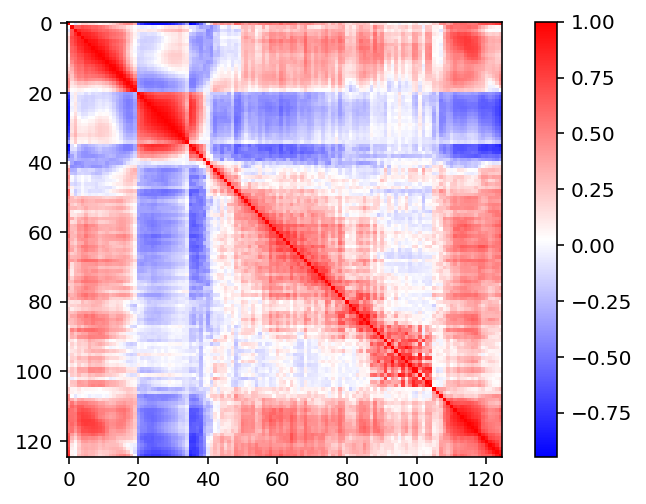

In [7]:
plt.imshow((funccov_zp[0]/np.sqrt(funccov_zp[0].diagonal())).T/np.sqrt(funccov_zp[0].diagonal()),cmap='bwr')
plt.colorbar()

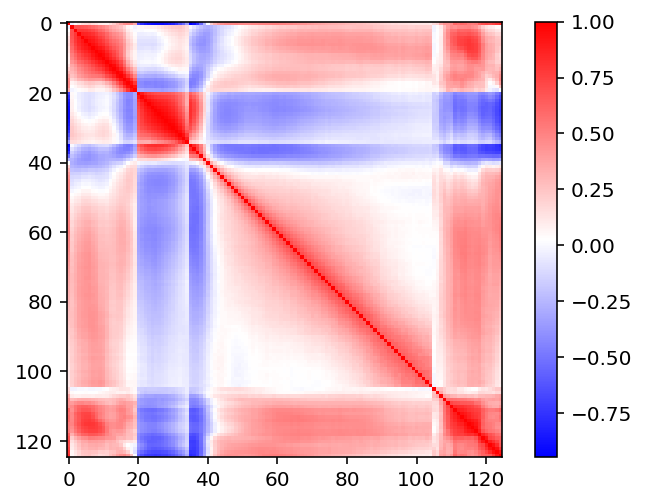

In [8]:
plt.imshow((np.mean(funccov_zp,axis=0)/np.sqrt(np.mean(funccov_zp,axis=0).diagonal())).T\
           /np.sqrt(np.mean(funccov_zp,axis=0).diagonal()),cmap='bwr')
plt.colorbar()

In [9]:
covar_real = np.cov(func_zp.T)

covar_cosmic = np.mean(funccov_zp,axis=0)   ##mean?

covar_tot = covar_cosmic+covar_real

##ngal(1)+wp(19)+vpf(15)+Pcic(70)+ggl(20)

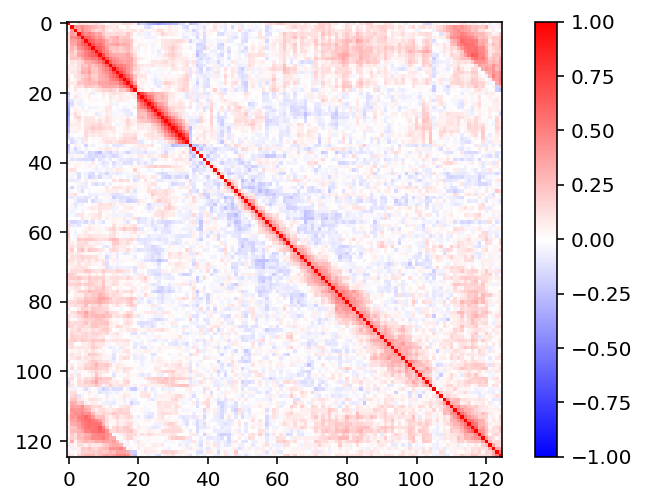

In [39]:
plt.imshow((covar_real/np.sqrt(covar_real.diagonal())).T\
           /np.sqrt(covar_real.diagonal()),vmin=-1,vmax=1,cmap='bwr')
plt.colorbar()

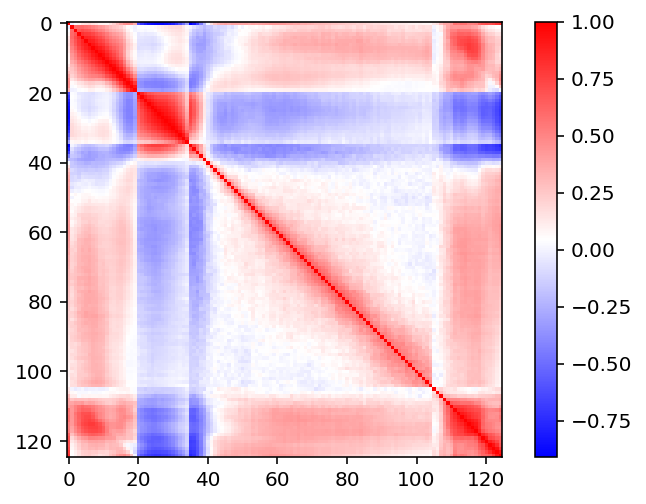

In [32]:
plt.imshow((covar_tot/np.sqrt(covar_tot.diagonal())).T\
           /np.sqrt(covar_tot.diagonal()),cmap='bwr')
plt.colorbar()

In [10]:
pert = np.load('020518_all_func_ps.npz')

In [11]:
pert.files

['i', 'func_all', 'param']

In [12]:
func = pert['func_all']
param = pert['param']
ip = pert['i']

In [13]:
dfdp = np.zeros((7,125))

def dfdpi(i_p,i_f):
    return np.linalg.lstsq((param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p])[:,np.newaxis],\
                           func[2000*i_p:2000*(i_p+1),i_f]-np.mean(func_zp[:,i_f],axis=0))[0]

In [14]:
for i in range(7):
    for j in range(125):
        dfdp[i,j] = dfdpi(i,j)

In [15]:
%matplotlib auto
plt.ioff()

Using matplotlib backend: TkAgg


In [16]:
def plot_dfdp(i_p,i_f):
    plt.figure()
    plt.plot(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p],func[2000*i_p:2000*(i_p+1),i_f]-np.mean(func_zp[:,i_f],axis=0),'.')
    plt.plot(np.zeros(200),func_zp[:,i_f]-np.mean(func_zp[:,i_f],axis=0),'r^')
    plt.xlabel('dp'+str(i_p))
    plt.ylabel('df'+str(i_f))
    plt.axhline(0,c='k',linestyle='--')
    plt.axvline(0,c='k',linestyle='--')
    plt.plot(np.array((min(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p]),\
                       max(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p]))),\
             np.array((min(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p]),\
                       max(param[2000*i_p:2000*(i_p+1),i_p]-param_median[i_p])))*dfdp[i_p,i_f])
    plt.savefig('020618_dfdp_plots/p{}f{}'.format(i_p,i_f))
            
    plt.close()

In [17]:
for i in range(7):
    for j in range(125):
        plot_dfdp(i,j)

In [40]:
fmatrix = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covar_tot),dfdp[j]))

In [34]:
print np.sqrt(np.linalg.inv(fmatrix).diagonal())

[ 0.03030651  0.02967608  0.03366798  0.17199069  0.02968353  0.0850966
  0.11114667]


In [35]:
fmatrix

array([[  1.10384434e+04,  -1.15495406e+04,   1.24412188e+03,
         -2.72517400e+02,  -1.56477849e+03,   2.55702880e+02,
          5.64112686e+02],
       [ -1.15495406e+04,   1.80674079e+04,  -7.07042765e+03,
          1.48668427e+03,   1.02719481e+04,  -5.64691789e+02,
         -7.37616670e+02],
       [  1.24412188e+03,  -7.07042765e+03,   3.44065902e+04,
         -1.90798477e+03,  -4.29197117e+04,   1.92741483e+02,
         -3.80684661e+02],
       [ -2.72517400e+02,   1.48668427e+03,  -1.90798477e+03,
          3.16845236e+02,   2.77274207e+03,  -6.19961832e+01,
         -4.81019730e+01],
       [ -1.56477849e+03,   1.02719481e+04,  -4.29197117e+04,
          2.77274207e+03,   5.55478455e+04,  -3.63937999e+02,
          4.44615605e+02],
       [  2.55702880e+02,  -5.64691789e+02,   1.92741483e+02,
         -6.19961832e+01,  -3.63937999e+02,   1.69168167e+02,
         -6.95469804e+00],
       [  5.64112686e+02,  -7.37616670e+02,  -3.80684661e+02,
         -4.81019730e+01,   4.44

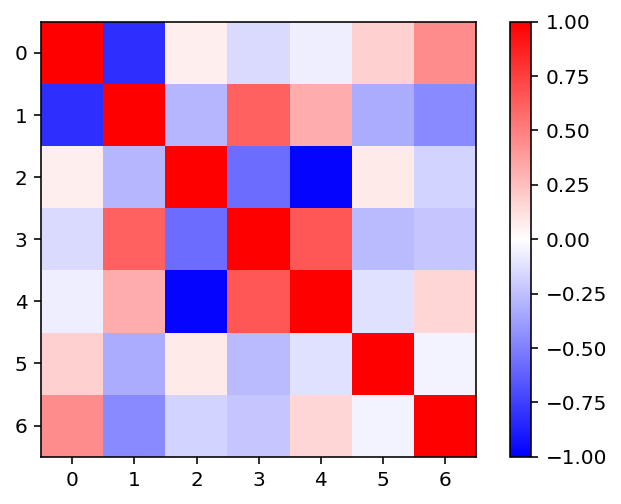

In [43]:
plt.imshow((fmatrix/np.sqrt(fmatrix.diagonal())).T\
           /np.sqrt(fmatrix.diagonal()),vmin=-1,vmax=1,cmap='bwr')
plt.colorbar()

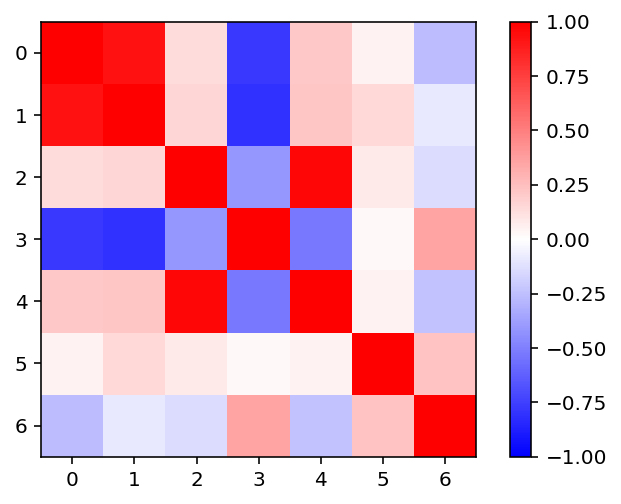

In [44]:
plt.imshow((np.linalg.inv(fmatrix)/np.sqrt(np.linalg.inv(fmatrix).diagonal())).T\
           /np.sqrt(np.linalg.inv(fmatrix).diagonal()),vmin=-1,vmax=1,cmap='bwr')
plt.colorbar()

In [25]:
fmatrix = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        fmatrix[i,j] = np.dot(dfdp[i][:105],np.dot(np.linalg.inv(covar_tot[:105,:105]),dfdp[j][:105]))

In [26]:
print np.sqrt(np.linalg.inv(fmatrix).diagonal())

[ 0.03323148  0.03315529  0.0473192   0.20425369  0.04227605  0.09183682
  0.12483099]


In [22]:
fmatrix = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        fmatrix[i,j] = np.dot(dfdp[i][:35],np.dot(np.linalg.inv(covar_tot[:35,:35]),dfdp[j][:35]))

In [23]:
print np.sqrt(np.linalg.inv(fmatrix).diagonal())

[ 0.08559515  0.08843451  0.07246363  0.49144513  0.06346964  0.20103683
  0.27945887]


In [27]:
fmatrix = np.zeros((7,7))
for i in range(7):
    for j in range(7):
        fmatrix[i,j] = np.dot(dfdp[i][:20],np.dot(np.linalg.inv(covar_tot[:20,:20]),dfdp[j][:20]))

In [28]:
print np.sqrt(np.linalg.inv(fmatrix).diagonal())

[ 0.09509992  0.09877418  0.19996857  0.58178818  0.15332329  0.32588311
  0.48839361]


## alpha, logM1, sigma_logM, logM0, logMmin, Acen, Asat